In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation
from drl_grams import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D

mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.axisbelow'] = True
%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

# Genetic Algorithms

In the directory `genetic_algorithm_results/` the results obtained using genetic algorithms can be found. Different subdirectories represent different combinations of hyperparameters, a summary of the hyper-parameters and system parameters used to obtain each directory can be accesed by calling the `print_params` function 

In [2]:
directory1 = 'genetic_algorithm_results/rb_zhang/'
directory2 = 'genetic_algorithm_results/rb_oaps/'
directory3 = 'genetic_algorithm_results/lb_zhang/'
directory4 = 'genetic_algorithm_results/lb_oaps/'

In [3]:
print_ga_params(directory1)

Showing parameters for genetic_algorithm_results/rb_zhang/:
╒═══════════════════╤═══════════════════════╤══════════════╕
│ Section           │ Parameter             │ Value        │
╞═══════════════════╪═══════════════════════╪══════════════╡
│ system_parameters │ initial_n             │ 8            │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ final_n               │ 64           │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ n_step                │ 4            │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ dt                    │ 0.15         │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ b                     │ 100          │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ speed_fraction        │ 1.1          │
├───────────────────┼───────────────────────┼──────────────┤
│ ga_initialization │ num

Time evolution for different trials and parameters can be studied. Here we study 20 samples obtained using three different fitness functions:
- **reward based**: emulates RL reward from [1], in the sense that it accumulates over time steps rewarding better fidelity and discounting for each extra step with a reward decay gamma to promote faster transmissions
- **natural based**: also accumulates over time steps but rewards a transmission that behaves in a similar way to the natural evolution. The *wave* propagates at a similar speed but tries to achieve a higher max probability.
- **ipr based**: rewards a localized transition, in the sense that it attempts to have a concentrated package

We also study to action sets:
- **Zhang actions**: Set of actions used in the original work of Zhang et al [1]
- **One Action Per Site**: Set of actions consisting of the N actions corresponding to a control site on each qubit plus the *zero* action which means not controlling any site.

We can analyze the obtained results for different combinations of fitness functions and rewards. The following graph shows max and mean fidelity obtained in 20 iterations of the genetic algorithm.

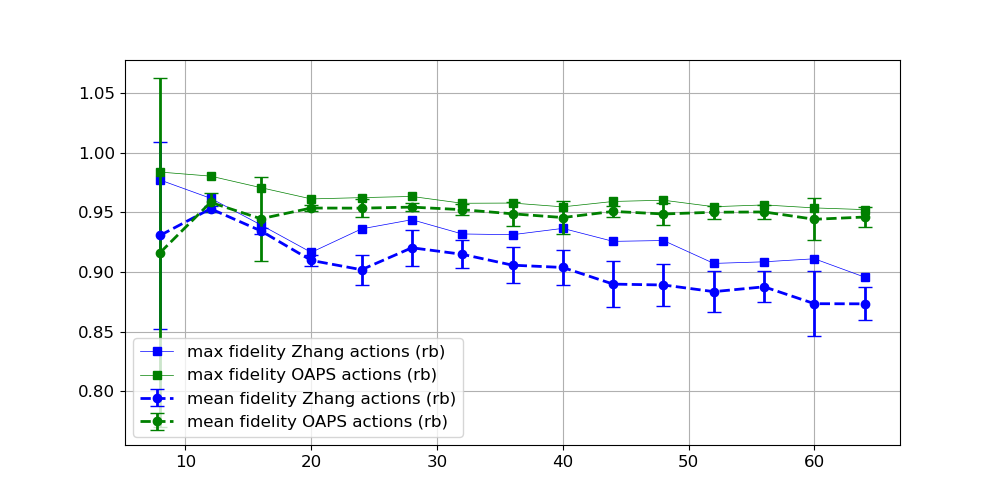

In [4]:
plt.figure(figsize=(10, 5))
plot_mean_max([directory1, directory2],labels=[' fidelity Zhang actions (rb)', ' fidelity OAPS actions (rb)'],column='max_fidelity')
plt.grid()
plt.legend(loc='lower left')

# Effect of different fitness functions

To study the effect of different fitness functions we can also study the behaviour of the transition probability over time.

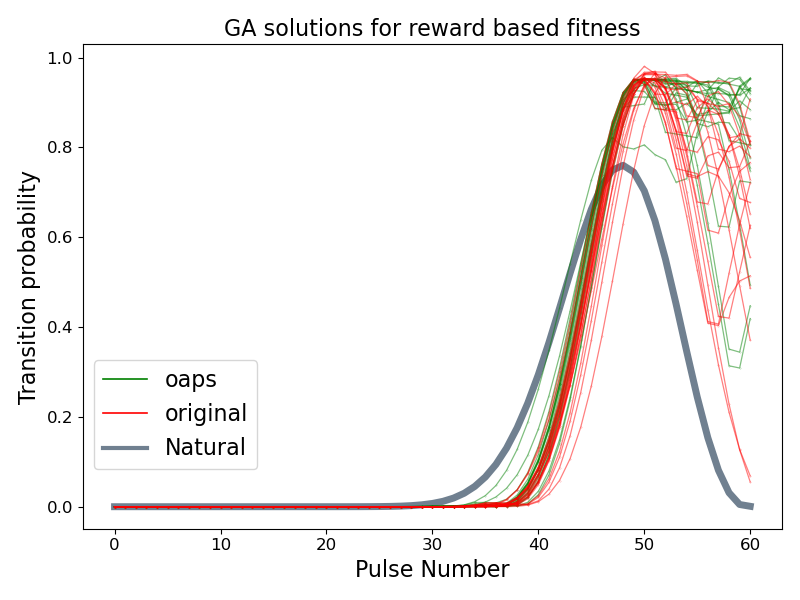

In [11]:
plt.figure(figsize=(8, 6))
fs=16
plt.title('GA solutions for reward based fitness', fontsize=fs)
n=12
plot_ga_solutions([directory1,directory2],n,['original','oaps'],['oaps','original'],add_natural=True,fs=16)
